In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews = pd.read_csv("airbnb/reviews.csv")
listings = pd.read_csv("airbnb/listings.csv")

/Users/aritraghosh/anaconda2/envs/PythonDatae/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...
3,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...
4,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\n\...


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20190715000710,2019-07-15,Hyde Park - Walk to UChicago/16 min Train Down...,"Be the sole guest in a quiet, vintage, 2nd flo...","The private bedroom has a queen size bed, beds...","Be the sole guest in a quiet, vintage, 2nd flo...",none,My apartment is located one block from beautif...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.89
1,4505,https://www.airbnb.com/rooms/4505,20190715000710,2019-07-15,We're back. 365 Great Reviews. 1 bad one.,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.96
2,7126,https://www.airbnb.com/rooms/7126,20190715000710,2019-07-15,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,f,moderate,f,f,1,1,0,0,2.86
3,9811,https://www.airbnb.com/rooms/9811,20190715000710,2019-07-15,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,f,strict_14_with_grace_period,f,f,8,8,0,0,0.59
4,10610,https://www.airbnb.com/rooms/10610,20190715000710,2019-07-15,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,Newly furnished with queen bed and the comfort...,The condo is the 2nd floor in a lovely 1912 3-...,none,It's a 10 minute walk from the lakefront bike ...,...,t,f,moderate,f,f,4,1,3,0,0.68


In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


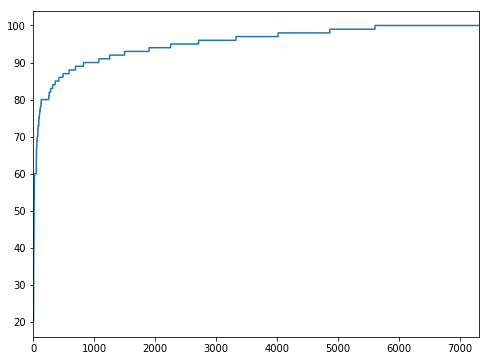

In [6]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

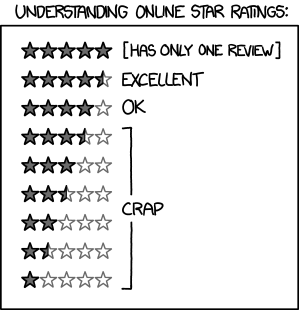

In [13]:
from IPython.display import Image

Image("https://imgs.xkcd.com/comics/star_ratings.png")

In [7]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:50]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

it's a wonderful trip experience. I didn't except the bedroom is so big and have a queen size bed.  it's very comfortable very quiet. and the host is very kind. she prepared breakfast and dinner for me. I am so appreciate everything she did for me.
compound: 0.9489, neg: 0.0, neu: 0.69, pos: 0.31, 
This is my first trip using Airbnb. I was a little nervous before the trip, and didn't know what to expect. I had a wonderful two days stay. The room is big, clean. The location is safe, quite, and convenient. The host is very kind and warm, make me feel like at home. The next morning I arrived, Chicago was cold and snowing, she drove me to my workshop location. after I checked out, she drove me to the hotel I booked for my next meeting. I could not expect any better experience than  this. I am very appreciated all the things she did for me. 
compound: 0.9519, neg: 0.037, neu: 0.776, pos: 0.187, 
The reservation was canceled 80 days before arrival. This is an automated posting.
compound: 0.0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aritraghosh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aritraghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [12]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [13]:
pscores

[{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.9489},
 {'neg': 0.037, 'neu': 0.776, 'pos': 0.187, 'compound': 0.9519},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.038, 'neu': 0.844, 'pos': 0.118, 'compound': 0.9669},
 {'neg': 0.021, 'neu': 0.838, 'pos': 0.142, 'compound': 0.9809},
 {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9689},
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.9857},
 {'neg': 0.014, 'neu': 0.607, 'pos': 0.379, 'compound': 0.9971},
 {'neg': 0.011, 'neu': 0.854, 'pos': 0.134, 'compound': 0.9752},
 {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9594},
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8779},
 {'neg': 0.038, 'neu': 0.647, 'pos': 0.315, 'compound': 0.9412},
 {'neg': 0.02, 'neu': 0.778, 'pos': 0.202, 'compound': 0.9538},
 {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9412},
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.9599},
 {'neg': 0.075, 'neu': 0.482, 'pos': 0.443, 'compound

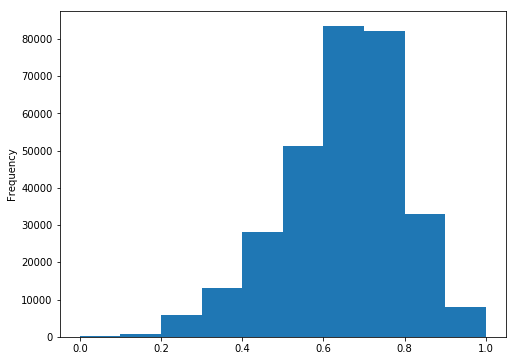

In [14]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

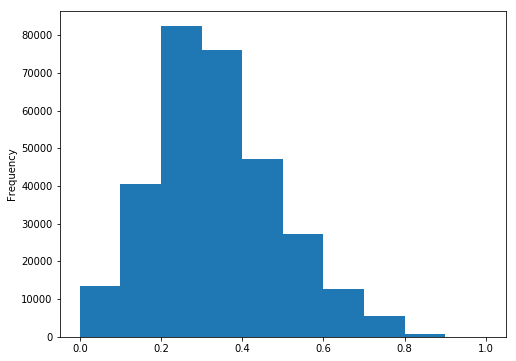

In [15]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

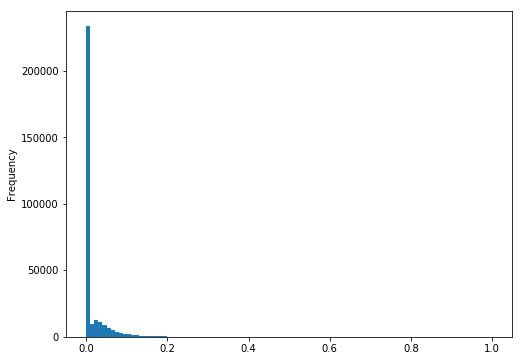

In [16]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

In [22]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.690,0.310
1,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.776,0.187
2,The reservation was canceled 80 days before ar...,0.0000,0.000,1.000,0.000
3,Rebecca was an absolutely wonderful host.\r\n\...,0.9669,0.038,0.844,0.118
4,Rebecca really tried to make it feel like home...,0.9809,0.021,0.838,0.142


In [29]:
scored_reviews.to_csv("Sentiment_Analysis.csv", index=False)

In [30]:
analysis = pd.read_csv("Sentiment_Analysis.csv")
analysis.head(20)

,review,compound,negativity,neutrality,positivity
0,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.690,0.310
1,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.776,0.187
2,The reservation was canceled 80 days before ar...,0.0000,0.000,1.000,0.000
3,Rebecca was an absolutely wonderful host.\r\n\...,0.9669,0.038,0.844,0.118
4,Rebecca really tried to make it feel like home...,0.9809,0.021,0.838,0.142
5,Hi. i just return from Chicago and want to sha...,0.9689,0.000,0.743,0.257
6,"Rebecca is a very charming and nice personn, ...",0.9857,0.000,0.510,0.490
7,A Great host. Rebecca was very helpful with ev...,0.9971,0.014,0.607,0.379
8,My wife and I had a wonderful experience stayi...,0.9752,0.011,0.854,0.134
9,I stayed 10 days with Rebecca and had a most p...,0.9594,0.000,0.793,0.207


In [32]:
reviews = reviews.rename(columns={"comments": "review"})

In [33]:
merge_df = pd.merge(reviews, analysis, how='inner', on='review')

In [35]:
merge_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,review,compound,negativity,neutrality,positivity
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.690,0.310
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.776,0.187
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...,0.0000,0.000,1.000,0.000
3,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\n\...,0.9669,0.038,0.844,0.118
4,2384,31820011,2015-05-10,2873370,Krishanu,Rebecca really tried to make it feel like home...,0.9809,0.021,0.838,0.142


In [45]:
merge_df.drop(['date', 'reviewer_id', 'reviewer_name', 'id'], axis=1, inplace=True)

KeyError: "['date' 'reviewer_id' 'reviewer_name'] not found in axis"

In [37]:
merge_df.head()

,listing_id,id,review,compound,negativity,neutrality,positivity
0,2384,25218143,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.690,0.310
1,2384,28475392,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.776,0.187
2,2384,30273263,The reservation was canceled 80 days before ar...,0.0000,0.000,1.000,0.000
3,2384,31363208,Rebecca was an absolutely wonderful host.\r\n\...,0.9669,0.038,0.844,0.118
4,2384,31820011,Rebecca really tried to make it feel like home...,0.9809,0.021,0.838,0.142


In [ ]:
merge_df.to_csv("Sentiment_Analysis_updated.csv", index=False)